Libreta

In [2]:
random_state = 345387

#Imports
import matplotlib
from pathlib import Path
import pandas as pd
import random as rd
from sklearn.model_selection import train_test_split
from sklearn import set_config

In [3]:
target = 'Bebedor_Riesgo'
filepath_or_buffer = Path('.') / 'dataframe.csv'
filepath_or_buffer_limpio = Path('.') / 'Basededatoslimpia.csv'

dtype = {target: 'category'}

arguments = {'filepath_or_buffer': filepath_or_buffer, 'dtype': dtype}
arguments_limpio = {'filepath_or_buffer': filepath_or_buffer_limpio, 'dtype': dtype}

data = pd.read_csv(**arguments)
data_clean = pd.read_csv(**arguments_limpio)

errores = []

Test Index: [0], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [1], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [2], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [3], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [4], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [5], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [6], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [7], Actual: [0], Predicted: [1], Error: 1.0
Test Index: [8], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [9], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [10], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [11], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [12], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [13], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [14], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [15], Actual: [0], Predicted: [1], Error: 1.0
Test Index: [16], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [17], Actual

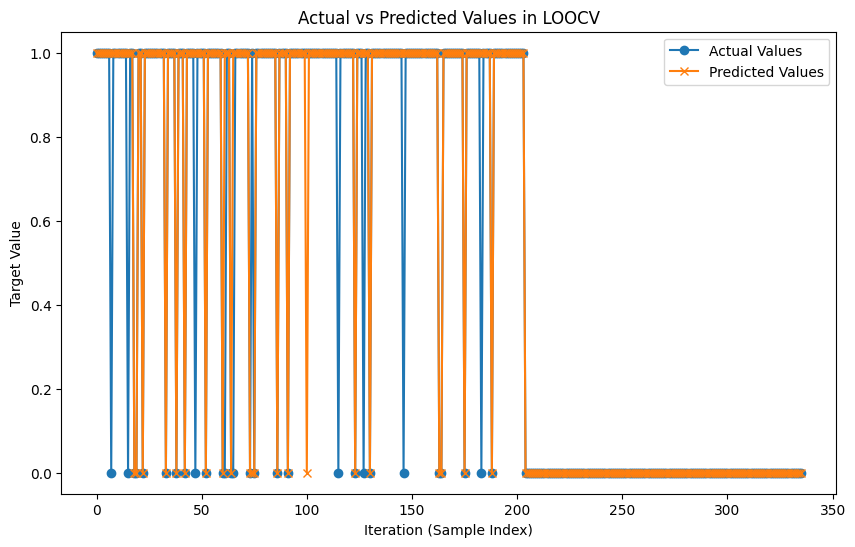

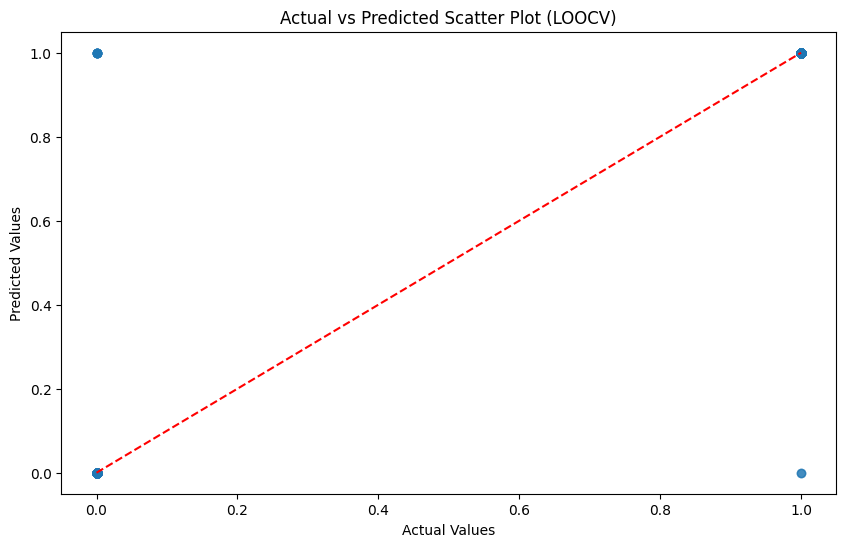

In [4]:
# Convertimos la columna objetivo a numérico, si es necesario
data[target] = pd.to_numeric(data[target], errors='coerce')

# Definimos x e y directamente
x = data.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data[target]  # Definimos la columna objetivo

# Continuamos con el proceso LOOCV y el modelo Random Forest
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier  # Cambia a RandomForestClassifier si es una tarea de clasificación
from sklearn.metrics import mean_squared_error  # Cambia esta métrica si necesitas otra evaluación
import matplotlib.pyplot as plt

# Configuración de Leave-One-Out
loo = LeaveOneOut()

# Inicializamos el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=random_state)  # Cambia a RandomForestClassifier para clasificación

# Listas para almacenar errores y predicciones de cada iteración
errors = []
actual_values = []
predicted_values = []

# Generamos las divisiones para LOOCV
for train_index, test_index in loo.split(x):
    # División de los datos en entrenamiento y prueba
    x_trainBase, x_testBase = x.iloc[train_index], x.iloc[test_index]
    y_trainBase, y_testBase = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo en el conjunto de entrenamiento
    random_forest_model.fit(x_trainBase, y_trainBase)
    
    # Predicción en el conjunto de prueba
    y_pred = random_forest_model.predict(x_testBase)
    
    # Cálculo del error (MSE en este caso) y almacenamiento
    error = mean_squared_error(y_testBase, y_pred)
    errors.append(error)
    
    # Almacenar valores reales y predichos para graficar
    actual_values.append(y_testBase.values[0])
    predicted_values.append(y_pred[0])
    
    # Ejemplo de impresión de resultados en cada iteración
    print(f"Test Index: {test_index}, Actual: {y_testBase.values}, Predicted: {y_pred}, Error: {error}")

# Cálculo del error promedio después de todas las iteraciones
mean_error = sum(errors) / len(errors)
print(f"\nMean Squared Error (LOOCV): {mean_error}")
errores.append(mean_error)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(predicted_values, label="Predicted Values", marker='x')
plt.xlabel("Iteration (Sample Index)")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values in LOOCV")
plt.legend()
plt.show()

# Gráfico de dispersión de valores reales vs valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.6)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--')  # Línea de referencia
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot (LOOCV)")
plt.show()


Test Index: [0], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [1], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [2], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [3], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [4], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [5], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [6], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [7], Actual: [0], Predicted: [0], Error: 0.0
Test Index: [8], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [9], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [10], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [11], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [12], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [13], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [14], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [15], Actual: [0], Predicted: [1], Error: 1.0
Test Index: [16], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [17], Actual

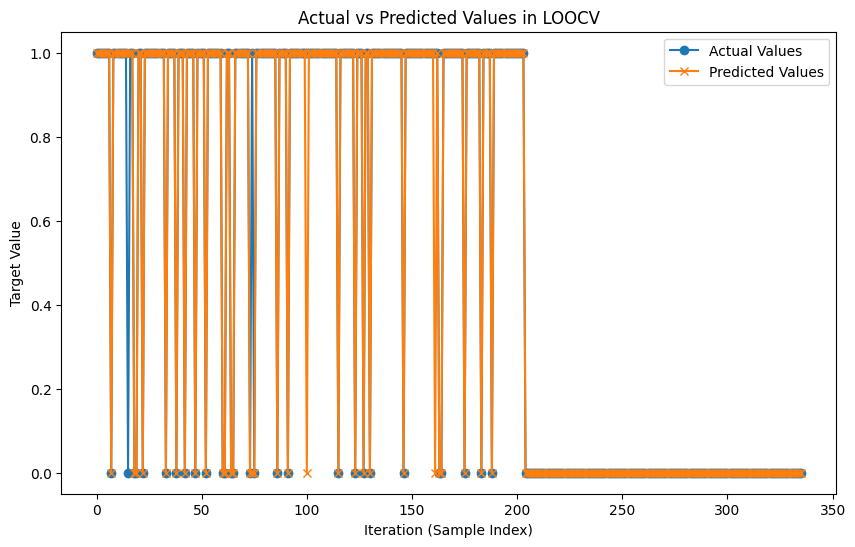

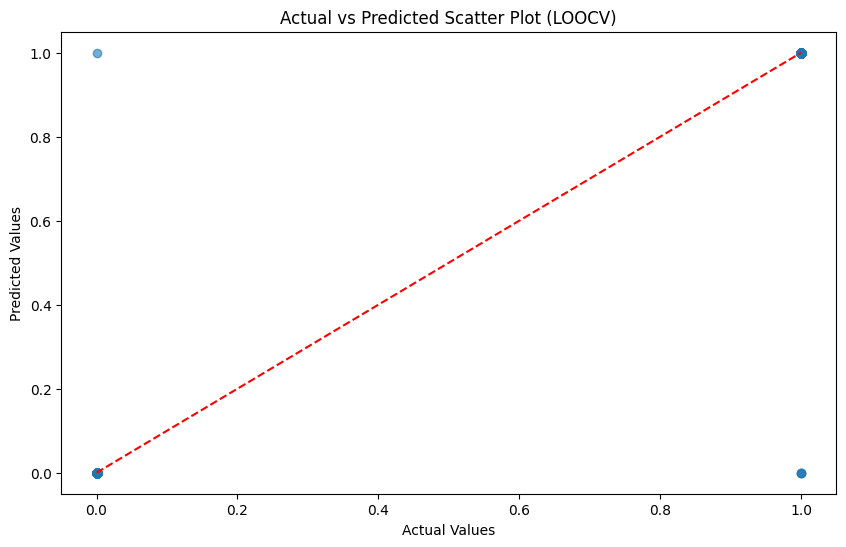

In [5]:
# Convertimos la columna objetivo a numérico, si es necesario
data_clean[target] = pd.to_numeric(data_clean[target], errors='coerce')

# Definimos x e y directamente
x = data_clean.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data_clean[target]  # Definimos la columna objetivo

# Continuamos con el proceso LOOCV y el modelo Random Forest
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier  # Cambia a RandomForestClassifier si es una tarea de clasificación
from sklearn.metrics import mean_squared_error  # Cambia esta métrica si necesitas otra evaluación
import matplotlib.pyplot as plt

# Configuración de Leave-One-Out
loo = LeaveOneOut()

# Inicializamos el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=random_state)  # Cambia a RandomForestClassifier para clasificación

# Listas para almacenar errores y predicciones de cada iteración
errors = []
actual_values = []
predicted_values = []

# Generamos las divisiones para LOOCV
for train_index, test_index in loo.split(x):
    # División de los datos en entrenamiento y prueba
    x_trainClean, x_testClean = x.iloc[train_index], x.iloc[test_index]
    y_trainClean, y_testClean = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo en el conjunto de entrenamiento
    random_forest_model.fit(x_trainClean, y_trainClean)
    
    # Predicción en el conjunto de prueba
    y_pred = random_forest_model.predict(x_testClean)
    
    # Cálculo del error (MSE en este caso) y almacenamiento
    error = mean_squared_error(y_testClean, y_pred)
    errors.append(error)
    
    # Almacenar valores reales y predichos para graficar
    actual_values.append(y_testClean.values[0])
    predicted_values.append(y_pred[0])
    
    # Ejemplo de impresión de resultados en cada iteración
    print(f"Test Index: {test_index}, Actual: {y_testClean.values}, Predicted: {y_pred}, Error: {error}")

# Cálculo del error promedio después de todas las iteraciones
mean_error = sum(errors) / len(errors)
print(f"\nMean Squared Error (LOOCV): {mean_error}")
errores.append(mean_error)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(predicted_values, label="Predicted Values", marker='x')
plt.xlabel("Iteration (Sample Index)")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values in LOOCV")
plt.legend()
plt.show()

# Gráfico de dispersión de valores reales vs valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.6)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--')  # Línea de referencia
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot (LOOCV)")
plt.show()

Test Index: [0], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [1], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [2], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [3], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [4], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [5], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [6], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [7], Actual: [0], Predicted: [0], Error: 0.0
Test Index: [8], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [9], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [10], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [11], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [12], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [13], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [14], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [15], Actual: [0], Predicted: [1], Error: 1.0
Test Index: [16], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [17], Actual

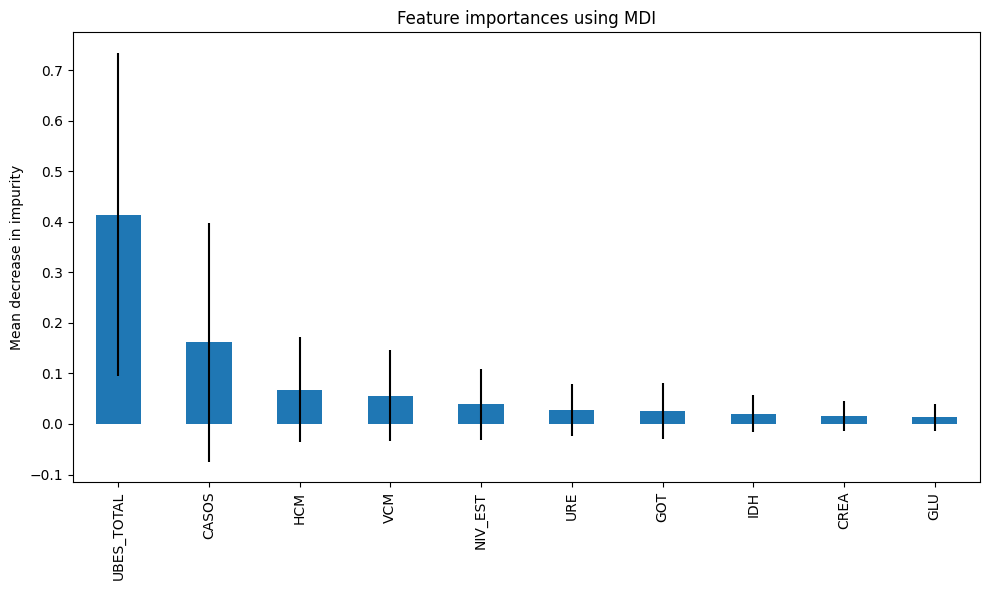

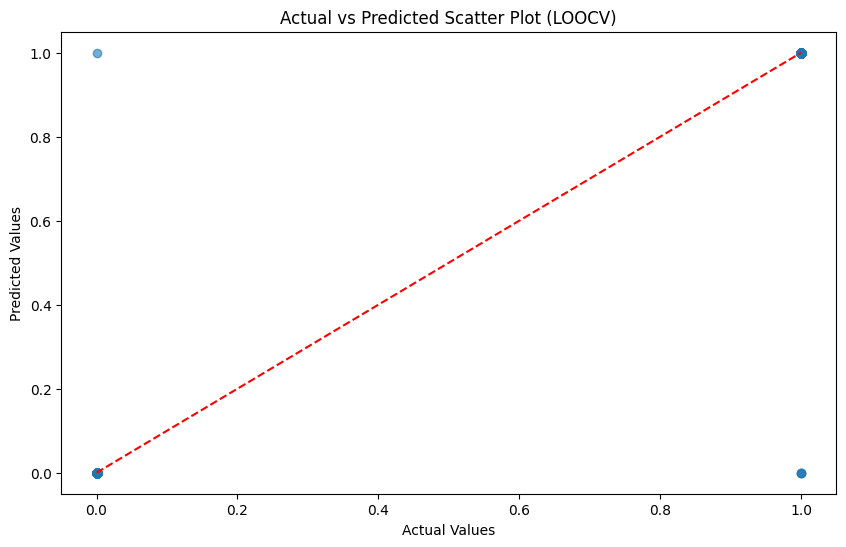

In [6]:
# Convertimos la columna objetivo a numérico, si es necesario
data_clean[target] = pd.to_numeric(data_clean[target], errors='coerce')

# Definimos x e y directamente
x = data_clean.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data_clean[target]  # Definimos la columna objetivo

# Continuamos con el proceso LOOCV y el modelo Random Forest
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier  # Cambia a RandomForestClassifier si es una tarea de clasificación
from sklearn.metrics import mean_squared_error  # Cambia esta métrica si necesitas otra evaluación
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configuración de Leave-One-Out
loo = LeaveOneOut()

# Inicializamos el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=random_state)  # Cambia a RandomForestClassifier para clasificación

# Listas para almacenar errores y predicciones de cada iteración
errors = []
actual_values = []
predicted_values = []

# Generamos las divisiones para LOOCV
for train_index, test_index in loo.split(x):
    # División de los datos en entrenamiento y prueba
    x_trainClean, x_testClean = x.iloc[train_index], x.iloc[test_index]
    y_trainClean, y_testClean = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo en el conjunto de entrenamiento
    random_forest_model.fit(x_trainClean, y_trainClean)
    
    # Predicción en el conjunto de prueba
    y_pred = random_forest_model.predict(x_testClean)
    
    # Cálculo del error (MSE en este caso) y almacenamiento
    error = mean_squared_error(y_testClean, y_pred)
    errors.append(error)
    
    # Almacenar valores reales y predichos para graficar
    actual_values.append(y_testClean.values[0])
    predicted_values.append(y_pred[0])
    
    # Ejemplo de impresión de resultados en cada iteración
    print(f"Test Index: {test_index}, Actual: {y_testClean.values}, Predicted: {y_pred}, Error: {error}")

# Cálculo del error promedio después de todas las iteraciones
mean_error = sum(errors) / len(errors)
print(f"\nMean Squared Error (LOOCV): {mean_error}")

# Importancia de las características
importances = random_forest_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)

# Convertimos std a una Serie de pandas para alinear índices
std = pd.Series(std, index=x.columns)
forest_importances = pd.Series(importances, index=x.columns)

# Selección de las 10 características más importantes
forest_importances = forest_importances.nlargest(10)
std = std[forest_importances.index]  # Seleccionamos la desviación estándar correspondiente

# Graficar la importancia de las características
fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Gráfico de dispersión de valores reales vs valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.6)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--')  # Línea de referencia
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot (LOOCV)")
plt.show()



In [7]:
# Importancia de las características
importances = random_forest_model.feature_importances_
forest_importances = pd.Series(importances, index=x.columns)

# Selección de las 10 características más importantes
top_10 = forest_importances.nlargest(10).index

# Crear un nuevo DataFrame con solo las 10 características más importantes y la columna objetivo
data_clean_top_10 = data_clean[top_10.tolist() + [target]]

# Mostrar el nuevo DataFrame
data_clean_top_10.head()


,UBES_TOTAL,CASOS,HCM,VCM,NIV_EST,URE,GOT,IDH,CREA,GLU,Bebedor_Riesgo
0,36.0,1,31.2,89.5,0,35.0,25.0,14.3,0.97,93.0,1
1,28.0,1,33.4,98.9,0,32.0,17.0,14.0,0.65,81.0,1
2,168.0,1,31.4,94.9,0,37.0,18.0,13.4,1.02,90.0,1
3,105.0,1,32.2,102.9,0,23.0,21.0,13.8,0.71,94.0,1
4,84.0,1,32.3,94.0,0,30.0,146.0,14.5,0.88,89.0,1


C:\Users\javid\AppData\Local\Temp\ipykernel_23296\2642271613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_top_10[target] = pd.to_numeric(data_clean_top_10[target], errors='coerce')


Test Index: [0], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [1], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [2], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [3], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [4], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [5], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [6], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [7], Actual: [0], Predicted: [0], Error: 0.0
Test Index: [8], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [9], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [10], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [11], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [12], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [13], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [14], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [15], Actual: [0], Predicted: [0], Error: 0.0
Test Index: [16], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [17], Actual

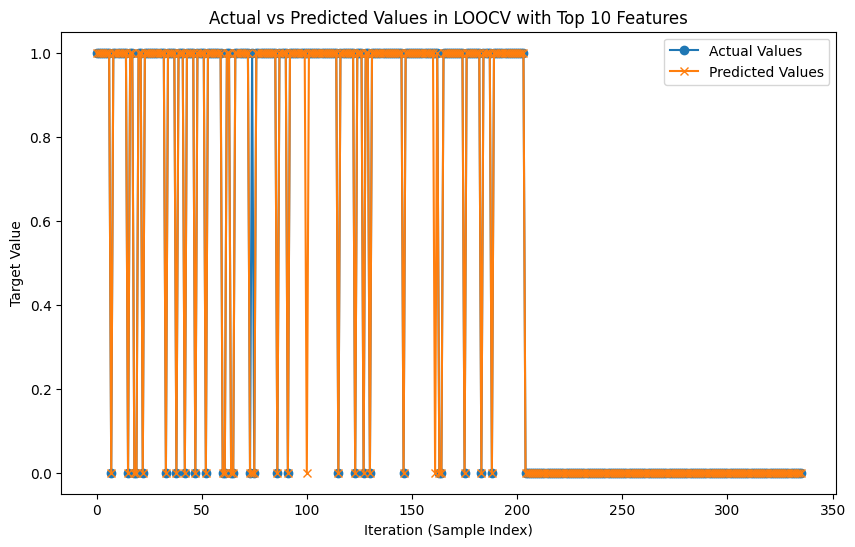

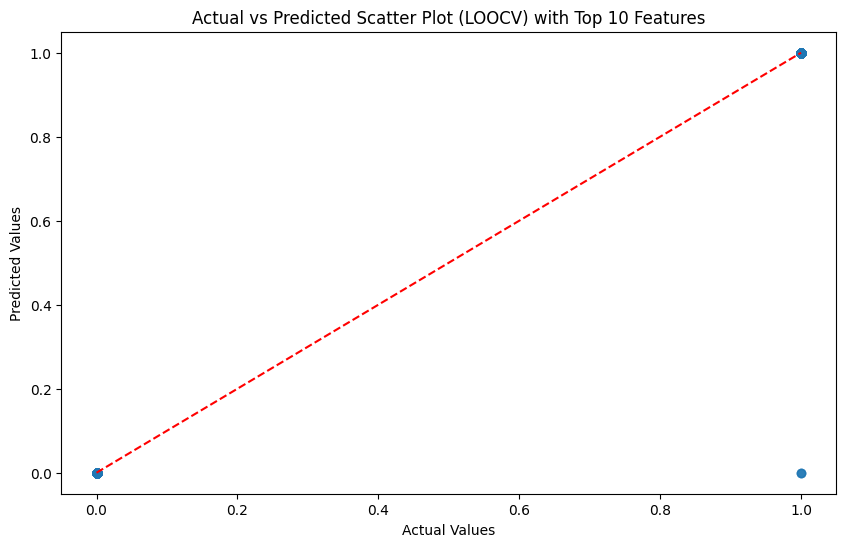

In [8]:
# Convertimos la columna objetivo a numérico, si es necesario
data_clean_top_10[target] = pd.to_numeric(data_clean_top_10[target], errors='coerce')

# Definimos x e y directamente para el nuevo DataFrame reducido
x = data_clean_top_10.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data_clean_top_10[target]  # Definimos la columna objetivo

# Continuamos con el proceso LOOCV y el modelo Random Forest
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier  # Cambia a RandomForestClassifier si es una tarea de clasificación
from sklearn.metrics import mean_squared_error  # Cambia esta métrica si necesitas otra evaluación
import matplotlib.pyplot as plt

# Configuración de Leave-One-Out
loo = LeaveOneOut()

# Inicializamos el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=random_state)  # Cambia a RandomForestClassifier para clasificación

# Listas para almacenar errores y predicciones de cada iteración
errors = []
actual_values = []
predicted_values = []

# Generamos las divisiones para LOOCV
for train_index, test_index in loo.split(x):
    # División de los datos en entrenamiento y prueba
    x_trainClean10, x_testClean10 = x.iloc[train_index], x.iloc[test_index]
    y_trainClean10, y_testClean10 = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo en el conjunto de entrenamiento
    random_forest_model.fit(x_trainClean10, y_trainClean10)
    
    # Predicción en el conjunto de prueba
    y_pred = random_forest_model.predict(x_testClean10)
    
    # Cálculo del error (MSE en este caso) y almacenamiento
    error = mean_squared_error(y_testClean10, y_pred)
    errors.append(error)
    
    # Almacenar valores reales y predichos para graficar
    actual_values.append(y_testClean10.values[0])
    predicted_values.append(y_pred[0])
    
    # Ejemplo de impresión de resultados en cada iteración
    print(f"Test Index: {test_index}, Actual: {y_testClean10.values}, Predicted: {y_pred}, Error: {error}")

# Cálculo del error promedio después de todas las iteraciones
mean_error = sum(errors) / len(errors)
print(f"\nMean Squared Error (LOOCV): {mean_error}")
errores.append(mean_error)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(predicted_values, label="Predicted Values", marker='x')
plt.xlabel("Iteration (Sample Index)")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values in LOOCV with Top 10 Features")
plt.legend()
plt.show()

# Gráfico de dispersión de valores reales vs valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.6)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--')  # Línea de referencia
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot (LOOCV) with Top 10 Features")
plt.show()


In [9]:
errores

[np.float64(0.03273809523809524),
 np.float64(0.011904761904761904),
 np.float64(0.008928571428571428)]

In [10]:
todos_errores = []
todos_errores.append(errores)
errores = []

RED BAYESIANA

Test Index: [0], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [1], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [2], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [3], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [4], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [5], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [6], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [7], Actual: [0], Predicted: [0], Accuracy: 1.0
Test Index: [8], Actual: [1], Predicted: [0], Accuracy: 0.0
Test Index: [9], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [10], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [11], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [12], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [13], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [14], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [15], Actual: [0], Predicted: [1], Accuracy: 0.0
Test Index: [16], Actual: [1], Pre

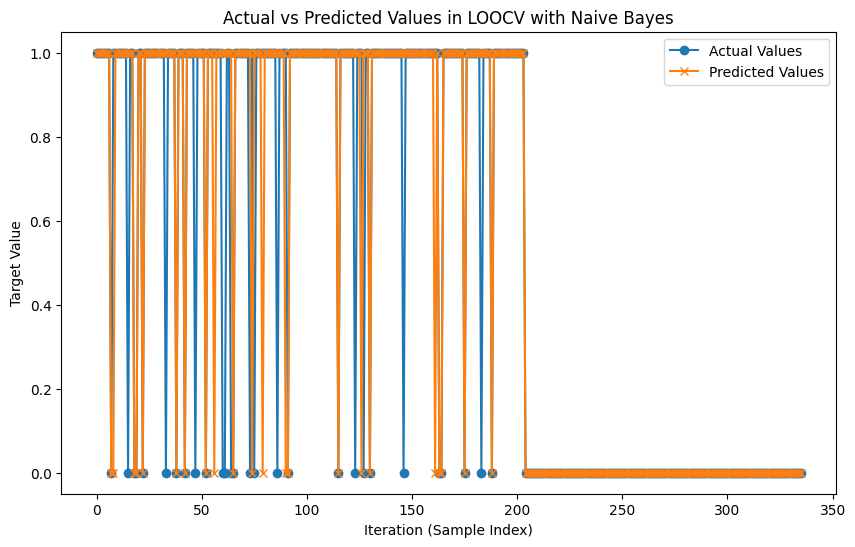

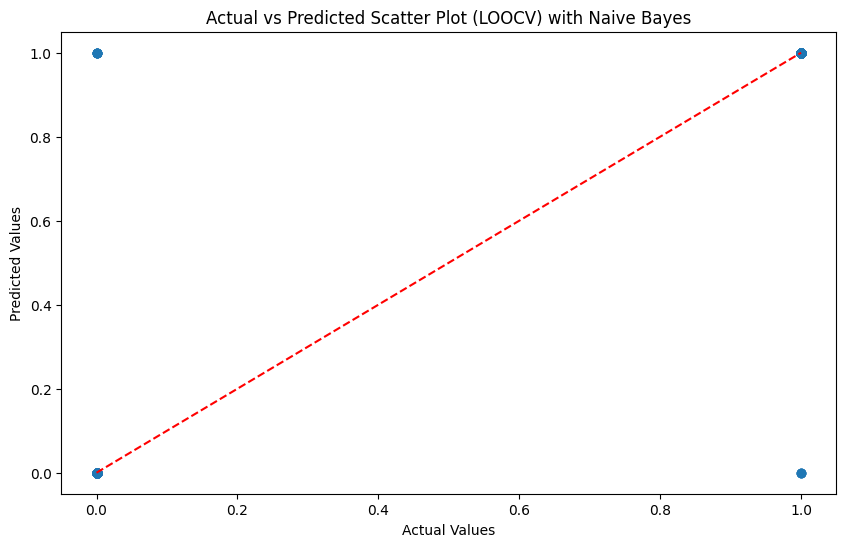

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Convertimos la columna objetivo a numérico, si es necesario
data[target] = pd.to_numeric(data[target], errors='coerce')

# Definimos x e y directamente
x = data.drop(columns=[target])
y = data[target]

# Imputamos valores faltantes en x
imputer = SimpleImputer(strategy="mean")  # Cambia la estrategia si prefieres la mediana o la moda
x = imputer.fit_transform(x)

# Configuración de Leave-One-Out y el modelo de Naive Bayes
loo = LeaveOneOut()
bayesian_model = GaussianNB()

# Listas para almacenar accuracy y predicciones de cada iteración
accuracies = []
actual_values = []
predicted_values = []

# Generamos las divisiones para LOOCV
for train_index, test_index in loo.split(x):
    # División de los datos en entrenamiento y prueba
    x_trainBase, x_testBase = x[train_index], x[test_index]
    y_trainBase, y_testBase = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo
    bayesian_model.fit(x_trainBase, y_trainBase)
    
    # Predicción y cálculo de la precisión
    y_pred = bayesian_model.predict(x_testBase)
    accuracy = accuracy_score(y_testBase, y_pred)
    accuracies.append(accuracy)
    
    # Guardamos los valores para graficar
    actual_values.append(y_testBase.values[0])
    predicted_values.append(y_pred[0])
    print(f"Test Index: {test_index}, Actual: {y_testBase.values}, Predicted: {y_pred}, Accuracy: {accuracy}")

# Cálculo de la precisión promedio después de LOOCV
mean_accuracy = sum(accuracies) / len(accuracies)
print(f"\nMean Accuracy (LOOCV): {mean_accuracy}")
errores.append(1-mean_accuracy)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(predicted_values, label="Predicted Values", marker='x')
plt.xlabel("Iteration (Sample Index)")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values in LOOCV with Naive Bayes")
plt.legend()
plt.show()

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.6)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot (LOOCV) with Naive Bayes")
plt.show()


In [12]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CASOS           336 non-null    int64  
 1   NIV_EST         336 non-null    int64  
 2   EST_CIV         336 non-null    int64  
 3   SEXO            336 non-null    float64
 4   EDAD            336 non-null    float64
 5   BAS             336 non-null    float64
 6   BAS_PERCENT     336 non-null    float64
 7   CHCM            336 non-null    float64
 8   CREA            336 non-null    float64
 9   EOS             336 non-null    float64
 10  EOS_PERCENT     336 non-null    float64
 11  ERITRO          336 non-null    float64
 12  GLU             336 non-null    float64
 13  GOT             336 non-null    float64
 14  HB              336 non-null    float64
 15  HCM             336 non-null    float64
 16  HCTO            336 non-null    float64
 17  IDH             336 non-null    flo

Test Index: [0], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [1], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [2], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [3], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [4], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [5], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [6], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [7], Actual: [0], Predicted: [1], Accuracy: 0.0
Test Index: [8], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [9], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [10], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [11], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [12], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [13], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [14], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [15], Actual: [0], Predicted: [1], Accuracy: 0.0
Test Index: [16], Actual: [1], Pre

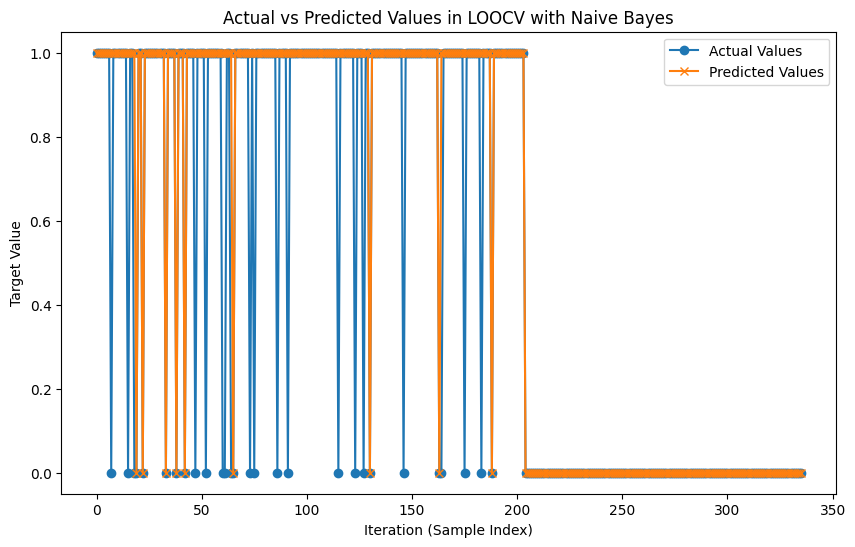

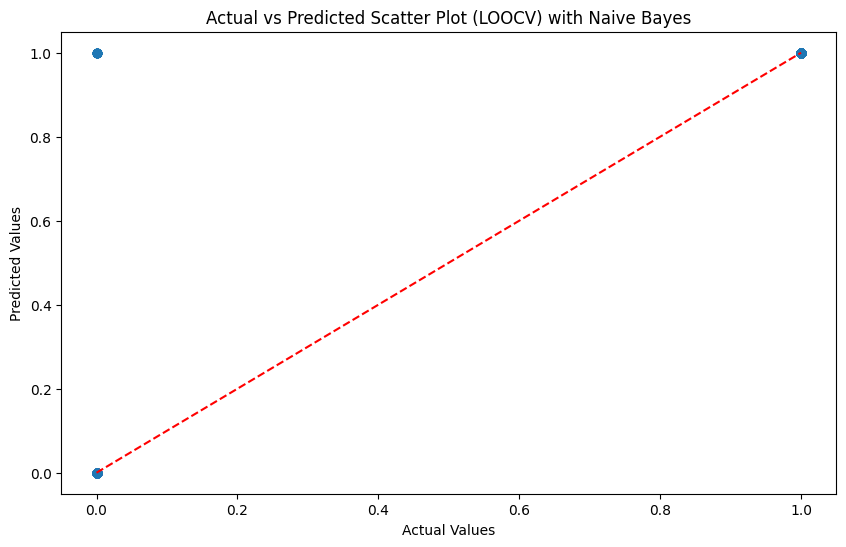

In [13]:
# Convertimos la columna objetivo a numérico, si es necesario
data_clean[target] = pd.to_numeric(data_clean[target], errors='coerce')

# Definimos x e y directamente
x = data_clean.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data_clean[target]  # Definimos la columna objetivo

# Continuamos con el proceso LOOCV y el modelo de Naive Bayes
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB  # Usamos GaussianNB para una red bayesiana
from sklearn.metrics import accuracy_score  # Cambiamos la métrica a accuracy
import matplotlib.pyplot as plt

# Configuración de Leave-One-Out
loo = LeaveOneOut()

# Inicializamos el modelo de Naive Bayes
bayesian_model = GaussianNB()

# Listas para almacenar accuracy y predicciones de cada iteración
accuracies = []
actual_values = []
predicted_values = []

# Generamos las divisiones para LOOCV
for train_index, test_index in loo.split(x):
    # División de los datos en entrenamiento y prueba
    x_trainClean, x_testClean = x.iloc[train_index], x.iloc[test_index]
    y_trainClean, y_testClean = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo en el conjunto de entrenamiento
    bayesian_model.fit(x_trainClean, y_trainClean)
    
    # Predicción en el conjunto de prueba
    y_pred = bayesian_model.predict(x_testClean)
    
    # Cálculo de la precisión (accuracy) y almacenamiento
    accuracy = accuracy_score(y_testClean, y_pred)
    accuracies.append(accuracy)
    
    # Almacenar valores reales y predichos para graficar
    actual_values.append(y_testClean.values[0])
    predicted_values.append(y_pred[0])
    
    # Ejemplo de impresión de resultados en cada iteración
    print(f"Test Index: {test_index}, Actual: {y_testClean.values}, Predicted: {y_pred}, Accuracy: {accuracy}")

# Cálculo de la precisión promedio después de todas las iteraciones
mean_accuracy = sum(accuracies) / len(accuracies)
print(f"\nMean Accuracy (LOOCV): {mean_accuracy}")
errores.append(1-mean_accuracy)

# Graficar los resultados de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(predicted_values, label="Predicted Values", marker='x')
plt.xlabel("Iteration (Sample Index)")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values in LOOCV with Naive Bayes")
plt.legend()
plt.show()

# Gráfico de dispersión de valores reales vs valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.6)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--')  # Línea de referencia
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot (LOOCV) with Naive Bayes")
plt.show()


C:\Users\javid\AppData\Local\Temp\ipykernel_23296\2714755487.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_top_10[target] = pd.to_numeric(data_clean_top_10[target], errors='coerce')


Test Index: [0], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [1], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [2], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [3], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [4], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [5], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [6], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [7], Actual: [0], Predicted: [1], Accuracy: 0.0
Test Index: [8], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [9], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [10], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [11], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [12], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [13], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [14], Actual: [1], Predicted: [1], Accuracy: 1.0
Test Index: [15], Actual: [0], Predicted: [1], Accuracy: 0.0
Test Index: [16], Actual: [1], Pre

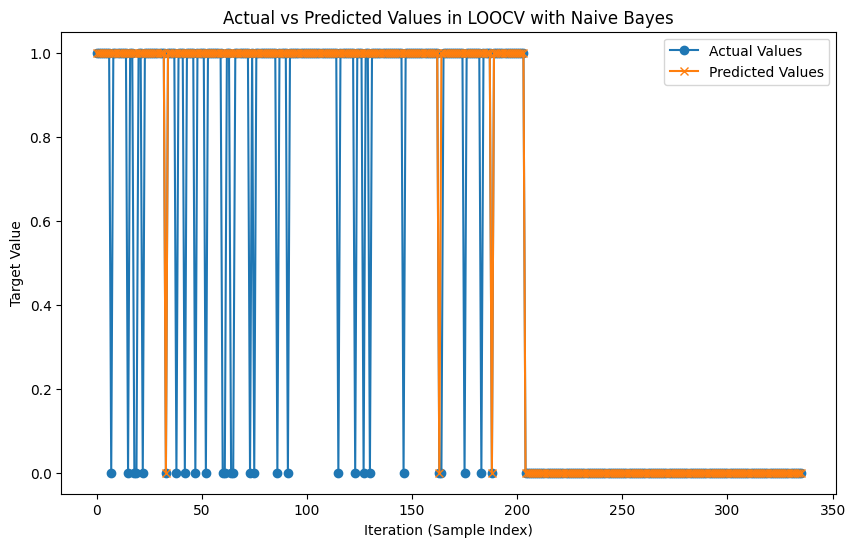

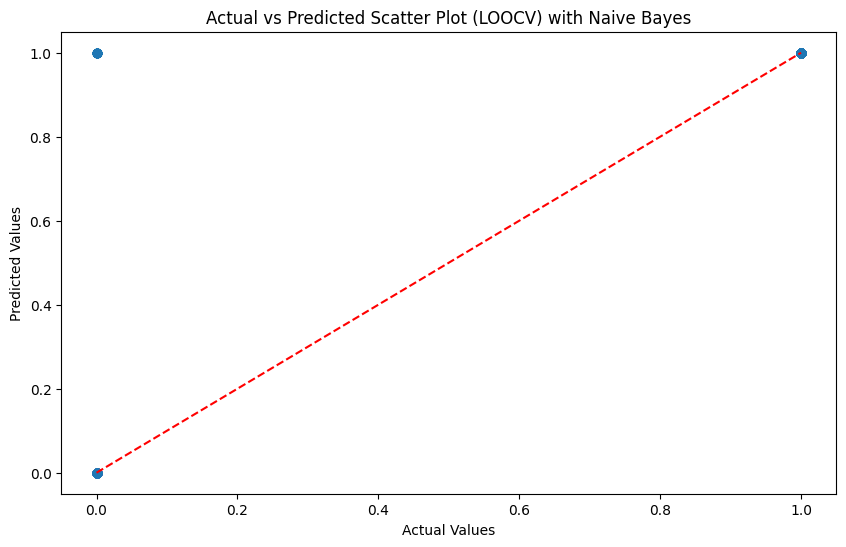

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Convertimos la columna objetivo a numérico, si es necesario
data_clean_top_10[target] = pd.to_numeric(data_clean_top_10[target], errors='coerce')

# Definimos x e y directamente para el nuevo DataFrame reducido
x = data_clean_top_10.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data_clean_top_10[target]  # Definimos la columna objetivo

# Imputamos valores faltantes en x con la media de cada columna
imputer = SimpleImputer(strategy="mean")
x = imputer.fit_transform(x)

# Configuración de Leave-One-Out
loo = LeaveOneOut()

# Inicializamos el modelo de Naive Bayes
bayesian_model = GaussianNB()

# Listas para almacenar accuracy y predicciones de cada iteración
accuracies = []
actual_values = []
predicted_values = []

# Generamos las divisiones para LOOCV
for train_index, test_index in loo.split(x):
    # División de los datos en entrenamiento y prueba
    x_trainClean10, x_testClean10 = x[train_index], x[test_index]
    y_trainClean10, y_testClean10 = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo en el conjunto de entrenamiento
    bayesian_model.fit(x_trainClean10, y_trainClean10)
    
    # Predicción en el conjunto de prueba
    y_pred = bayesian_model.predict(x_testClean10)
    
    # Cálculo de la precisión (accuracy) y almacenamiento
    accuracy = accuracy_score(y_testClean10, y_pred)
    accuracies.append(accuracy)
    
    # Almacenar valores reales y predichos para graficar
    actual_values.append(y_testClean10.values[0])
    predicted_values.append(y_pred[0])
    
    # Ejemplo de impresión de resultados en cada iteración
    print(f"Test Index: {test_index}, Actual: {y_testClean10.values}, Predicted: {y_pred}, Accuracy: {accuracy}")

# Cálculo de la precisión promedio después de todas las iteraciones
mean_accuracy = sum(accuracies) / len(accuracies)
print(f"\nMean Accuracy (LOOCV): {mean_accuracy}")
errores.append(1-mean_accuracy)

# Graficar los resultados de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(predicted_values, label="Predicted Values", marker='x')
plt.xlabel("Iteration (Sample Index)")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values in LOOCV with Naive Bayes")
plt.legend()
plt.show()

# Gráfico de dispersión de valores reales vs valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.6)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--')  # Línea de referencia
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot (LOOCV) with Naive Bayes")
plt.show()


In [15]:
errores

[0.059523809523809534, 0.05654761904761907, 0.07440476190476186]

In [ ]:
todos_errores.append(errores)
print(todos_errores)
errores = []

[[]]
